In [2]:
#importing lib

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [3]:
#checking top 5 rows

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#checking last 5 rows

df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [4]:
df.sample()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8198,FDR59,NaN,Regular,0.063554,Breads,263.6594,OUT027,1985,Medium,Tier 3,Supermarket Type3,3401.5722


# EDA

In [5]:
#checking shape

df.shape

(8523, 12)

In [6]:
#checking columns name
 
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
#checking datatype

df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
#checking info for dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
#checking null values
#null values are present in 2 columns

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

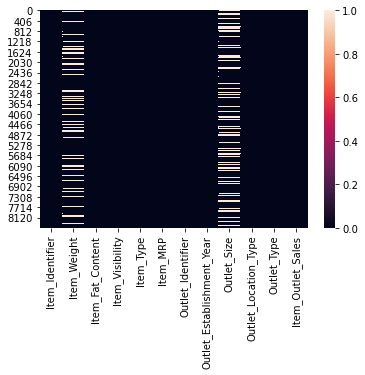

In [10]:
#heatmap for null values

sns.heatmap(df.isnull())

In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
#checking the uniqueness of label

df['Item_Outlet_Sales'].nunique()

3493

In [13]:
#checking count of outlet sales

df['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1230.3984    14
             ..
1883.5482     1
5386.9878     1
4231.8248     1
91.2146       1
3653.9104     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

# Description of dataset

In [14]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# observation:

In summarising the data we can also see that the dataset seems to be having more outliers as well as skewness in the data. The column Item_MRP and Outlet_Establishment_Year have huge outliers from the max of 266 and 2009 respectively. We will remove this skewness and outliers before building the models. These difference can also be seen in the Item_Outlet_Sales, since it is target variable so no need to worry about it as we are going to predict it

# Data Visualization
univariate Analysis


In [15]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [16]:
print(df['Item_Fat_Content'].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


This is a categorical data in which LF and Low fat classes belongs to Low Fat and reg belongs to Regular. So I am going to replace these classes with their respective categories

In [17]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')

In [18]:
#checking values count of item content

print(df['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Text(0.5, 1.0, 'Item fat content')

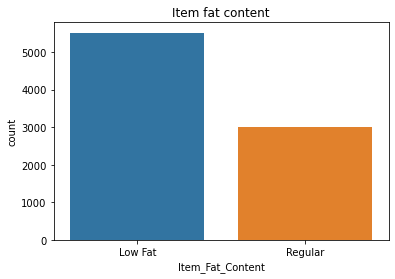

In [19]:
#count plot 

sns.countplot(df.Item_Fat_Content)
plt.title('Item fat content')

From this visualization we can observe that most of the products are Low fat content and very few are regular. This means if we produce low fat items then Sales also increases

In [20]:
#checking item type

df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Here Fruits and Vegetables have high value counts followed by Snacks Foods, Household etc

Text(0.5, 1.0, 'Item type')

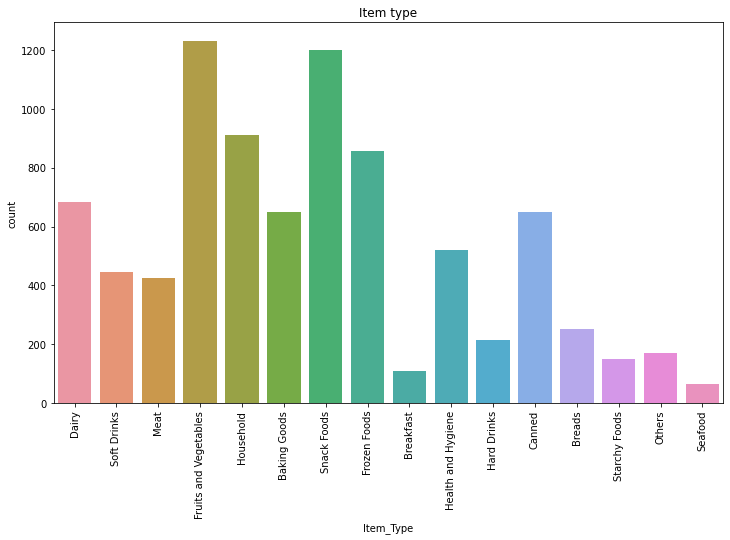

In [21]:
#countplot for item type

plt.figure(figsize=(12,7))
sns.countplot(df.Item_Type)
plt.xticks(rotation=90)
plt.title('Item type')

Here we can easily observe that the Fruits and Vegetables have high count followed by Snack Foods, Household and Frozen Foods. Most of the people comes to buy these products.

In [22]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [23]:
#checking value count

df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Text(0.5, 1.0, 'Outlet_Size')

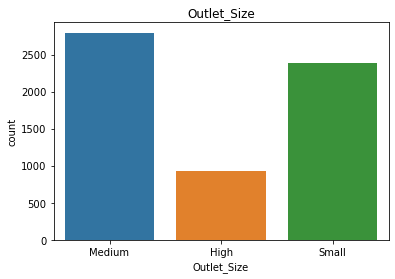

In [24]:
#countplot 

sns.countplot(df.Outlet_Size)
plt.title('Outlet_Size')

This is the size of the store in terms of ground area covered. Here we have 3 outlet_sizes in which the count of Medium outlet_size is more followed by Small outlet_size and High outlet_size has very less count of around 900

In [25]:
#checking the value counts

df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

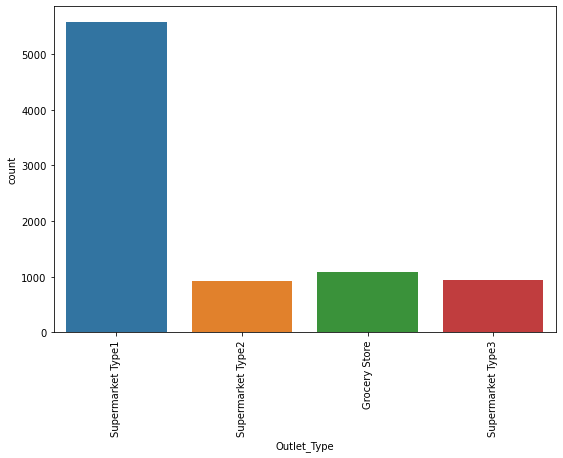

In [26]:
plt.figure(figsize=(9,6))
sns.countplot(df.Outlet_Type)
plt.xticks(rotation=90)

Here the Supermarket Type1 has high count say 5500 and is so much biased. This is because this outlet type may contain some different styles compare to others.

# Distribution of skewness

Text(0.5, 1.0, 'Outlet Establishment Year')

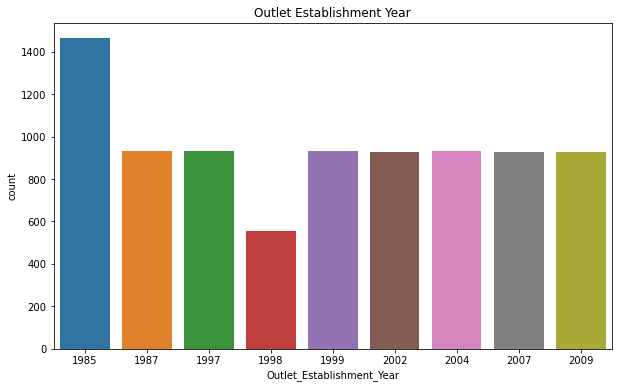

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(df.Outlet_Establishment_Year)
plt.title('Outlet Establishment Year')

Most of the outlets are established in the year 1985 and the counts of other establishment years are nearly 950

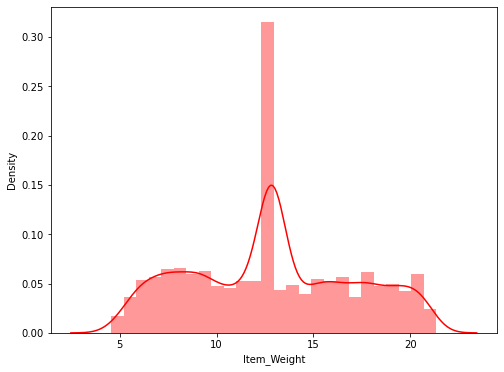

In [109]:
#The data is almost normally distributed 

plt.figure(figsize=(8,6))
sns.distplot(df.Item_Weight,kde=True,color='r')
plt.show()

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

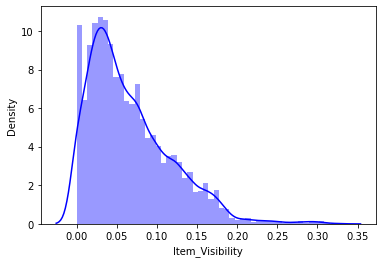

In [110]:
sns.distplot(df.Item_Visibility,color='b')

Here the data is not normally distributed and also has skewness

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

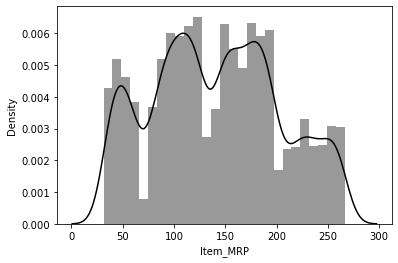

In [111]:
sns.distplot(df.Item_MRP,color='black')

The data is not normally distributed here and there is no skewness.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

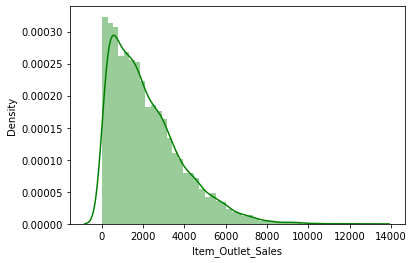

In [113]:
sns.distplot(df.Item_Outlet_Sales,color='g')

The data is not normally distributed and is also  skewed. 

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

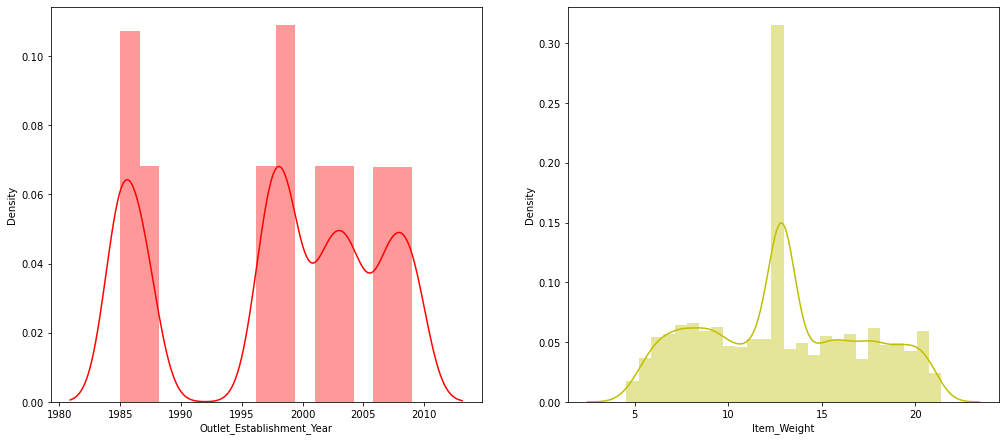

In [114]:
plt.figure(figsize=(17,16))
plt.subplot(2,2,1)
sns.distplot(df.Outlet_Establishment_Year,kde=True,color='red')
plt.subplot(2,2,2)
sns.distplot(df.Item_Weight,kde=True,color='y')



# Bivariate Analysis

In [35]:
df.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

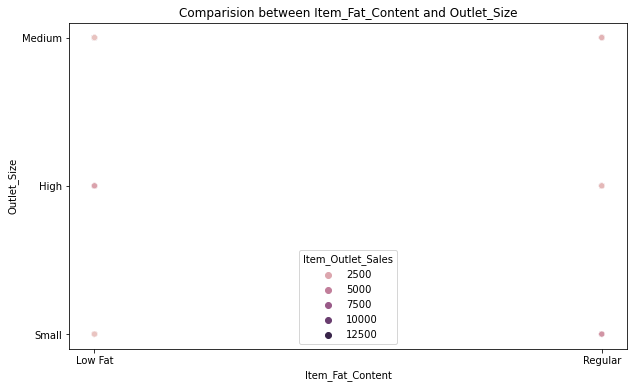

In [36]:
plt.figure(figsize=[10,6])
sns.scatterplot(x=df['Item_Fat_Content'],y=df['Outlet_Size'],data=df,hue=df["Item_Outlet_Sales"])
plt.title('Comparision between Item_Fat_Content and Outlet_Size')
plt.show()

Here the low fat items with High outlet sizes have nearly 5000 sales compare to others.

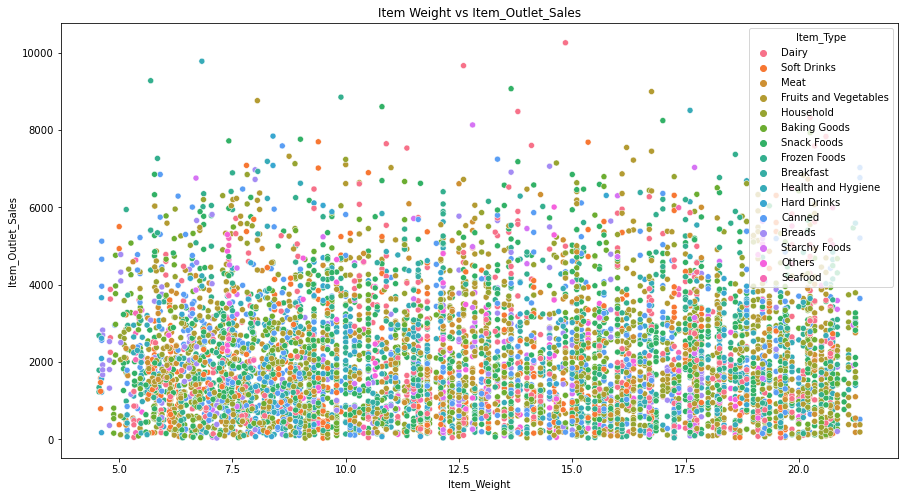

In [37]:
plt.figure(figsize=[15,8])
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',data=df)
plt.title('Item Weight vs Item_Outlet_Sales')
plt.show()

The data is scattered and there is no linear relationship between Item_Weight and Item_Outlet_Sales. Most of the Item_Types having Item_Weight between 5 to 25 have the sales nearly 5000. We can also notice some outliers here and there is very less correlation between these columns.

Text(0.5, 1.0, 'Item visibility vs Item outlet sale')

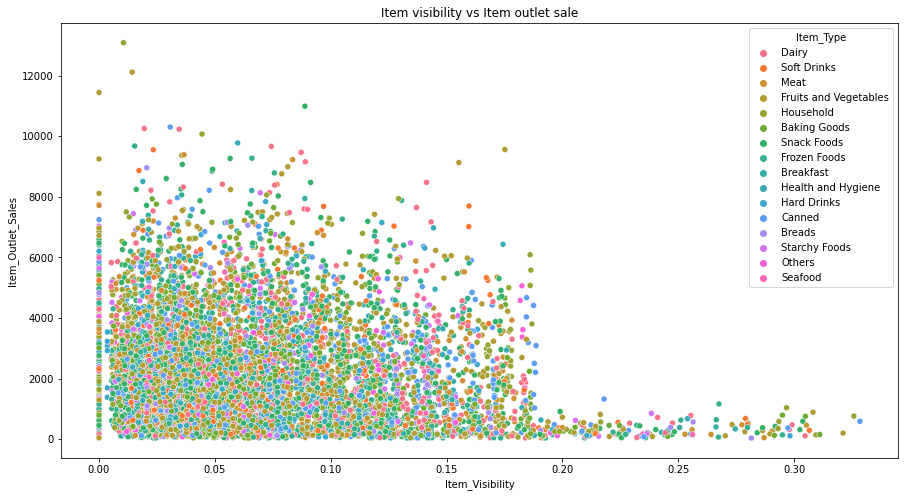

In [38]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df,hue='Item_Type')
plt.title('Item visibility vs Item outlet sale')

Most of the Items have very low visibility. The items between 0 to 0.05 have high outlet sales of 10000 though they have low visibility. So higher the visibility of item, lower the sales of the product. And some of them have high visibility but low sales. There are some outliers present in this case as well.

In [39]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Text(0.5, 1.0, 'Item visibility vs Item MRP')

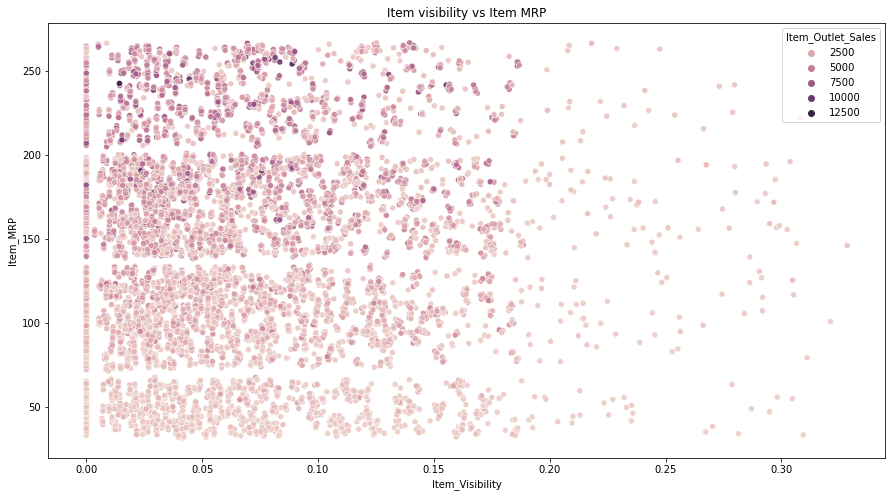

In [40]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Item_Visibility',y='Item_MRP',data=df,hue='Item_Outlet_Sales')
plt.title('Item visibility vs Item MRP')

The items having low visibility have maximum price which means high sales. As the visibility increses the price decreases.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

<Figure size 1080x720 with 0 Axes>

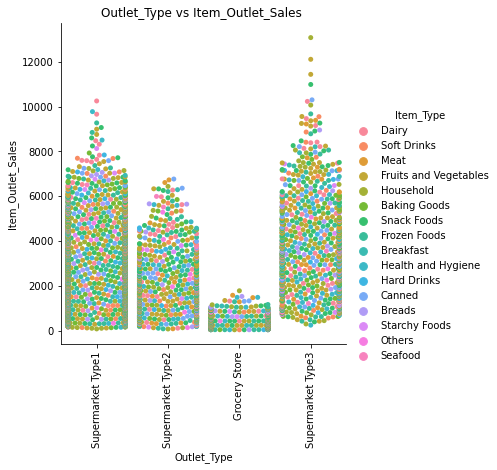

In [117]:
plt.figure(figsize=(15,10))
sns.catplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df,hue='Item_Type',kind='swarm')
plt.title('Outlet_Type vs Item_Outlet_Sales ')
plt.xticks(rotation=90)


The Supermarket Type3 is the one having the high Outlet sales on Item_Type followed by Supermarket Type1.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

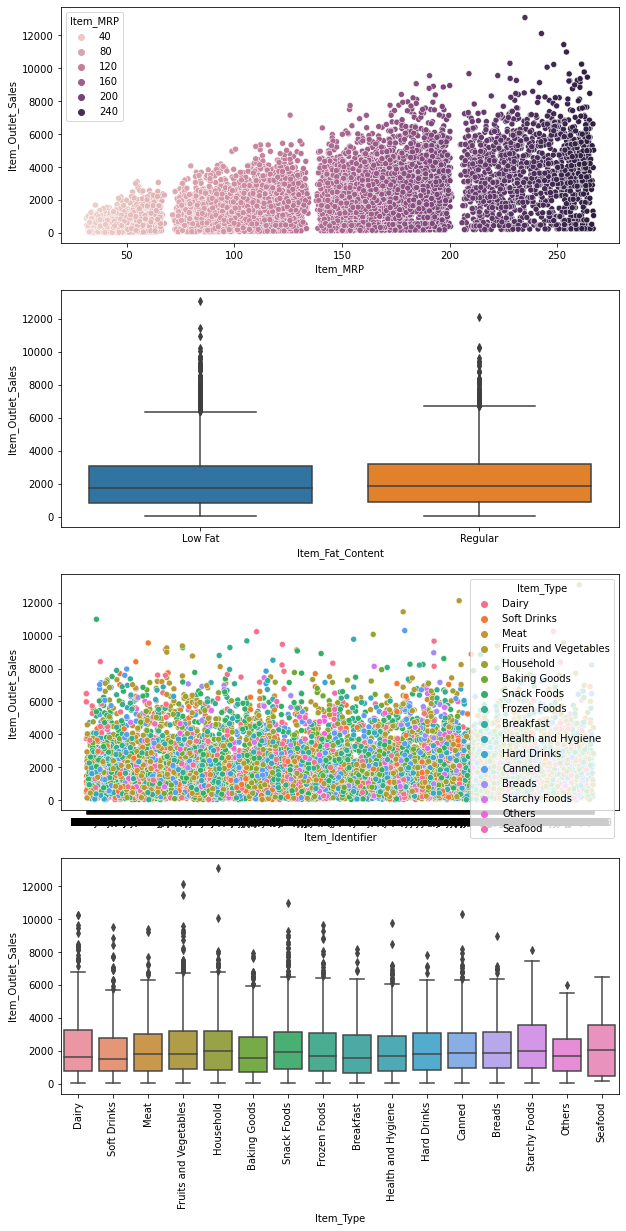

In [43]:
# Let's visualize all the features relationship with target variable

fig,axes=plt.subplots(4,1,figsize=(10,20))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_MRP',ax=axes[0],data=df)
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',ax=axes[1],data=df)
sns.scatterplot(x='Item_Identifier',y='Item_Outlet_Sales',hue='Item_Type',ax=axes[2],data=df)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[3],data=df)
plt.xticks(rotation=90)

From the above plots we can observe the following things

1.As the price increases the item sales increases this means both are correlated with each other.

2.Low Fat content items have high sales compare to Regular.

3.Item_ Identifier has less linear relationship with the target variabl

4.Fruits and vegetables have high sales followed by Snack Foods and Household.

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

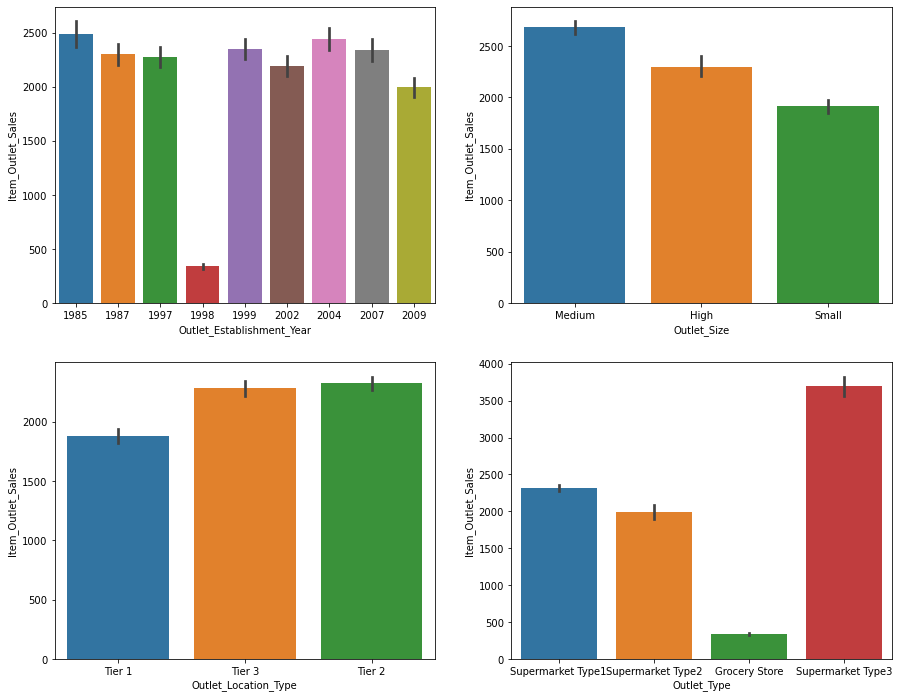

In [44]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=df)
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=df)
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=df)
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=df)

From the plots we can observe

1.Most of the outlets established in the year 1985 and they have high sales.

2.The Medium outlet size has high sales compared to other two.

3.The outlet located in the city Tier3 has high sales.

4.Supermarket Type3 has high sales followed by Type1

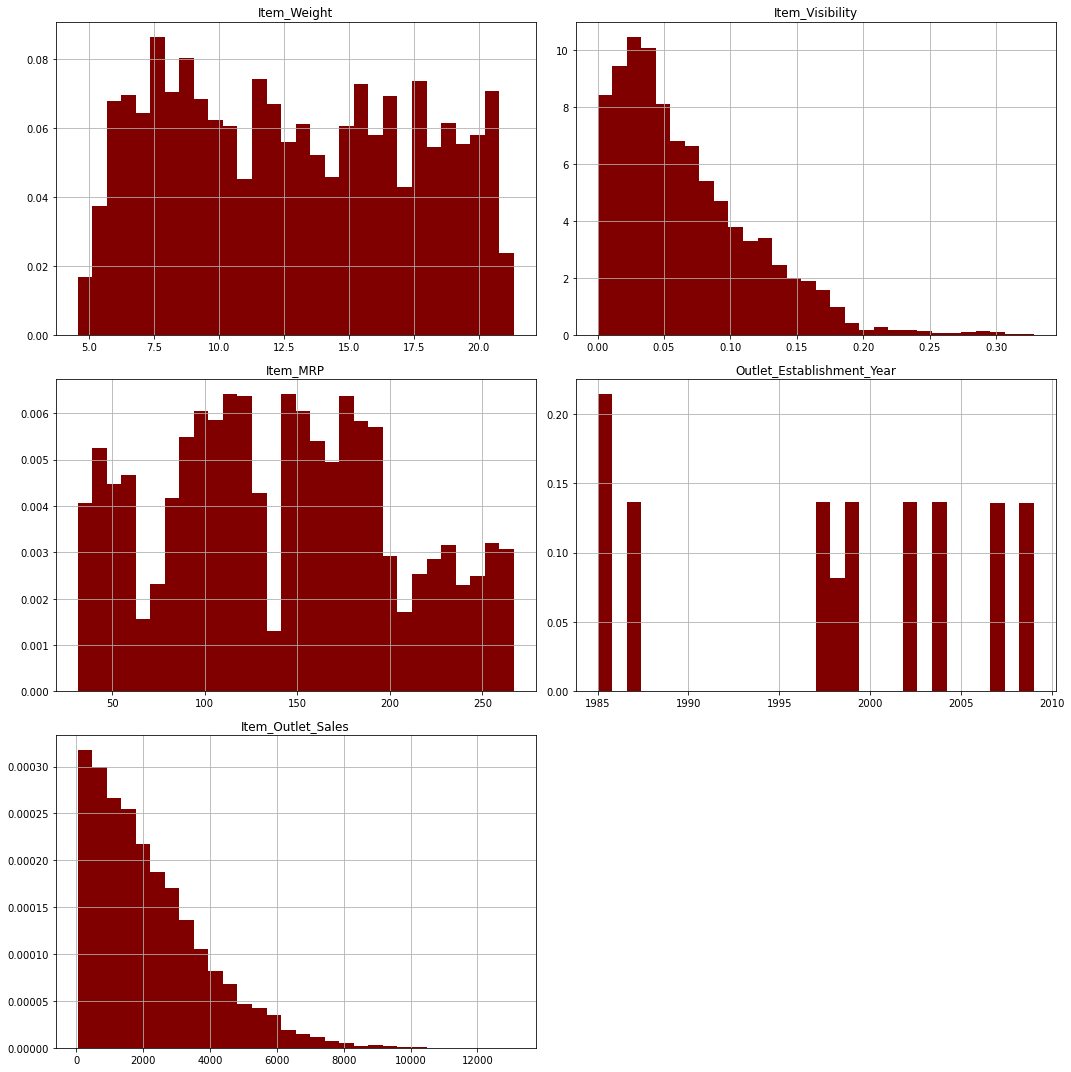

In [5]:
#Histogram

plt.rcParams['figure.figsize'] = (15,15)
df.hist(bins=30, color='maroon', density=True, label='Value', histtype='stepfilled', grid=True)
plt.tight_layout()
plt.show()

In [45]:
#checking correlation

df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

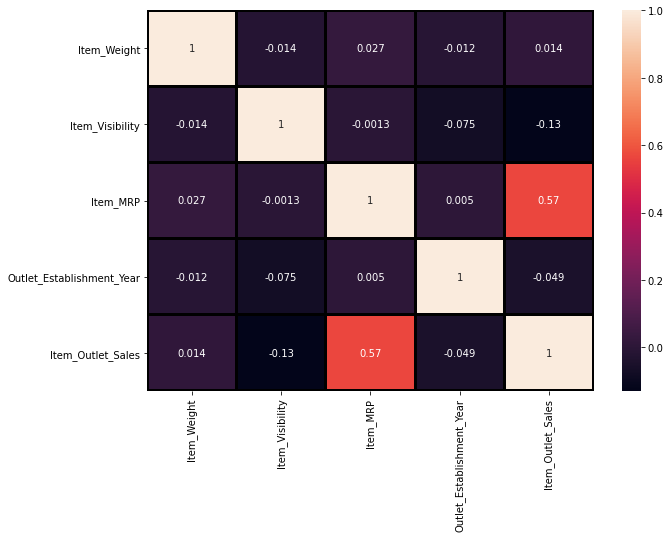

In [47]:
#heatmap for correlation
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=2)


This heat map contains both positive and negative correlation.

1.The feature Item_MRP is highly positively correlated with target variable Item_Outlet_Sales.

2.The feature Item_Weight has very low positive correlation with target variable.

3.The feature Item_Visibility and Outlet_Establishment_Year have very low negative correlation with the target variable.

4.We can also observe there is very less correlation between the features

# Data Cleaning

In [48]:
df.drop('Item_Identifier',axis=1,inplace=True)

In [49]:
df.drop('Outlet_Identifier',axis=1,inplace=True)

In [50]:
#checking null values

df.isnull().sum()


Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The features Item_Weight and Outlet_Size have missing values.

In [51]:
# Filling missing values in Item_Weight

df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].mean())

Outlet_Size is a categorical column and the mode of Outlet_Size is Medium since it has high value count, so we can fill the NAN values using mode method

In [52]:
#Filling missing values

df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [53]:
#checking the null values after filling

df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

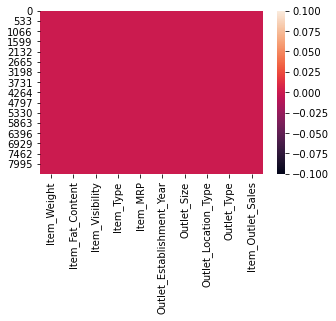

In [54]:
plt.figure(figsize=(5,3))
sns.heatmap(df.isnull())

# Checking the outliers

Item_Weight                     AxesSubplot(0.125,0.536818;0.110714x0.343182)
Item_Visibility              AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Item_MRP                     AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Outlet_Establishment_Year    AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Item_Outlet_Sales            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
dtype: object

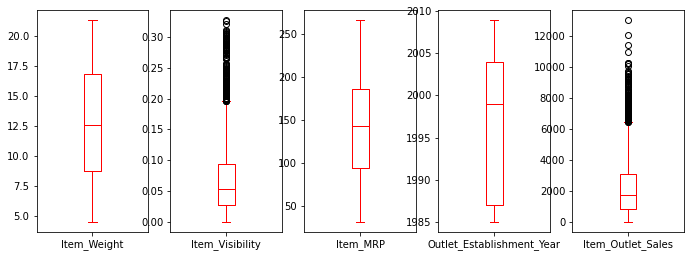

In [4]:
#some outliers are present

df.plot(kind='box',subplots=True,layout=(2,6),figsize=(14,9),color='r')

# Removing Outliers

In [56]:
#Zscore

variable=df[['Item_Visibility']]

In [57]:
from scipy.stats import zscore

z=np.abs(zscore(variable))
new_df=df[(z<3).all(axis=1)]
new_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [58]:
df.shape

(8523, 10)

In [59]:
#after removing outliers

new_df.shape

(8428, 10)

In [71]:
x=new_df.iloc[:,0:-1]
x.shape

(8428, 9)

In [61]:
y=new_df.iloc[:,-1]
y.shape

(8428,)

# Checking skewness

In [62]:
new_df.skew()

Item_Weight                  0.089907
Item_Visibility              0.795956
Item_MRP                     0.128945
Outlet_Establishment_Year   -0.409186
Item_Outlet_Sales            1.173070
dtype: float64

# Removing Skewness

In [63]:
from sklearn.preprocessing import PowerTransformer

scaler=PowerTransformer(method='yeo-johnson')
scaler

PowerTransformer()

In [64]:
feature=['Item_Visibility']
new_df[feature]=scaler.fit_transform(new_df[feature].values)
new_df[feature].head()

,Item_Visibility
0,-1.142270
1,-1.032913
2,-1.117874
3,-1.734798
4,-1.734798


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

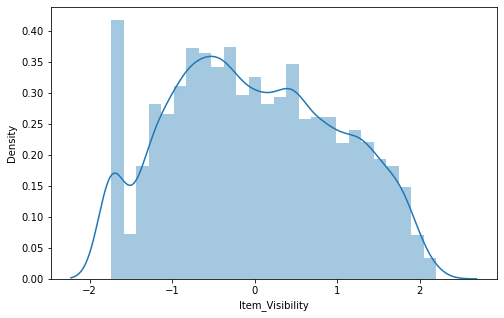

In [66]:
# After removing let's check how the data has been distributed in the column
plt.figure(figsize=(8,5))
sns.distplot(new_df["Item_Visibility"])

# Encoding the Data

In [67]:
#Encoding the columns with the help of label encoder

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
list=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for val in list:
    new_df[val]=le.fit_transform(new_df[val].astype(str))

In [68]:
new_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,-1.142270,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,-1.032913,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,-1.117874,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,-1.734798,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,-1.734798,9,53.8614,1987,0,2,1,994.7052


# Scaling the data

In [69]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()


In [72]:
x=ss.fit_transform(x)
x

array([[-0.84032811, -0.73671031, -1.14226961, ..., -0.27747727,
        -1.37696522, -0.27165828],
       [-1.63789487,  1.35738564, -1.03291304, ..., -0.27747727,
         1.09193445,  0.99327874],
       [ 1.09459715, -0.73671031, -1.11787359, ..., -0.27747727,
        -1.37696522, -0.27165828],
       ...,
       [-0.53357167, -0.73671031, -0.53775357, ...,  1.38936408,
        -0.14251539, -0.27165828],
       [-1.33349809,  1.35738564,  1.53830862, ..., -0.27747727,
         1.09193445,  0.99327874],
       [ 0.45748761, -0.73671031, -0.268203  , ...,  1.38936408,
        -1.37696522, -0.27165828]])

# Spliting the data

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=40)

# Choosing Best model

In [74]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),
      KNeighborsRegressor(),SVR(),ExtraTreesRegressor(),AdaBoostRegressor(),
      GradientBoostingRegressor()]
       
for m in model:
    
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('\n')
    print('Error and R2 Score of',m,'is :''\n')
    print('Mean Absolute Error''\n',mean_absolute_error(y_test,predm))
    print('Mean Squared Error''\n',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error''\n',np.sqrt(mean_squared_error(y_test,predm)))
    print('\n')
    print('R2 SCORE --''\n',r2_score(y_test,predm))



Error and R2 Score of LinearRegression() is :

Mean Absolute Error
 895.3077598217228
Mean Squared Error
 1447204.7843716461
Root Mean Squared Error
 1202.9982478672387


R2 SCORE --
 0.505478822894132


Error and R2 Score of DecisionTreeRegressor() is :

Mean Absolute Error
 1071.6876339264531
Mean Squared Error
 2354600.632241244
Root Mean Squared Error
 1534.4707987580748


R2 SCORE --
 0.1954145751558406


Error and R2 Score of RandomForestRegressor() is :

Mean Absolute Error
 796.5551009141955
Mean Squared Error
 1315897.849309628
Root Mean Squared Error
 1147.1259082200297


R2 SCORE --
 0.55034742807721


Error and R2 Score of KNeighborsRegressor() is :

Mean Absolute Error
 838.0191082957691
Mean Squared Error
 1417782.1396061429
Root Mean Squared Error
 1190.7065715809847


R2 SCORE --
 0.5155327703935676


Error and R2 Score of SVR() is :

Mean Absolute Error
 1253.3924717246432
Mean Squared Error
 2805832.562399278
Root Mean Squared Error
 1675.0619577792572


R2 SCORE --

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# GradientBoostingRegressor

parameters = {'n_estimators':[10,100,200],
             'criterion':['mse', 'mae'],
             'max_features':["auto","sqrt","log2"]}
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

In [76]:
gb=GradientBoostingRegressor(criterion='mse',max_features='log2',n_estimators=100,random_state=115)
gb.fit(x_train,y_train)
gb.score(x_train,y_train)
pred=gb.predict(x_test)
print('Mean Absolute Erro',mean_absolute_error(y_test,pred))
print('Mean Squared Error',mean_squared_error(y_test,pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 SCORe',r2_score(y_test,pred)*100)

Mean Absolute Erro 761.0374028681889
Mean Squared Error 1171118.4073358972
Root Mean Squared Error 1082.1822431253884
R2 SCORe 59.98196940887311


After tuning R2 score of our model has been increased and has 61%

# Saving  The MOdel

In [77]:
import joblib

joblib.dump(gb,"Big_Data_Mart_Sales.pkl")

['Big_Data_Mart_Sales.pkl']

I have saved the model using joblib.
Let's use test dataset for getting prediction from the trained model

# Test Data
Import the test dataset

In [78]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df1=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


This dataset has no target variable, we need to use our past data(trained data) to get the sales prediction.

In [79]:
df1.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [80]:
df1.shape

(5681, 11)

In [81]:
#checking the columns

df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [82]:
#checking the data types of data

df1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [83]:
#checking info

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [84]:
#checkinr null values
# null values are present


df1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<AxesSubplot:>

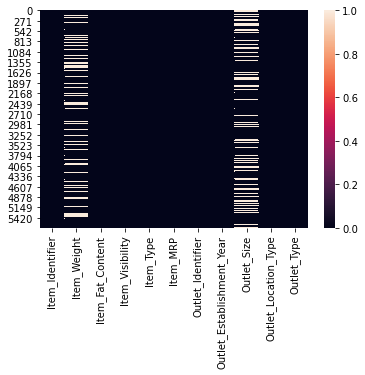

In [85]:
#heatmap for null values

import seaborn as sns
sns.heatmap(df1.isnull())

# Description of test Dataset

In [86]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


This gives some statistical information about our test dataset. The count of item weight is 4705 all the other columns have same counts, which means it has null values

In [87]:
# Checking value count of Item_Fat_Content

print(df1["Item_Fat_Content"].value_counts())

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64


This is a categorical data in which LF and Low fat classes belongs to Low Fat and reg belongs to Regular. So I am going to replace these classes with their respective categories

In [88]:
df1["Item_Fat_Content"]=df1["Item_Fat_Content"].replace('LF','Low Fat')
df1["Item_Fat_Content"]=df1["Item_Fat_Content"].replace('low fat','Low Fat')
df1["Item_Fat_Content"]=df1["Item_Fat_Content"].replace('reg','Regular')

Now I have replaced LF,low fat by Low Fat and reg by Regula

# Data Cleaning
Treating Missing values using imputation techniques

In [89]:
df1.drop('Item_Identifier',axis=1,inplace=True)
df1.drop('Outlet_Identifier',axis=1,inplace=True)

In [90]:
df1.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [91]:
#two features are having null values
#filling missing null values

df1['Item_Weight']=df1['Item_Weight'].fillna(df1['Item_Weight'].mean())
df1['Outlet_Size']=df1['Outlet_Size'].fillna(df1['Outlet_Size'].mode()[0])

In [92]:
#Checking null values after filling
#no null values found

df1.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

<AxesSubplot:>

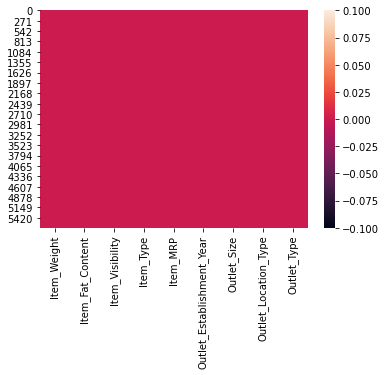

In [93]:
import seaborn as sns

sns.heatmap(df1.isnull())


# Checking Outliers

<AxesSubplot:>

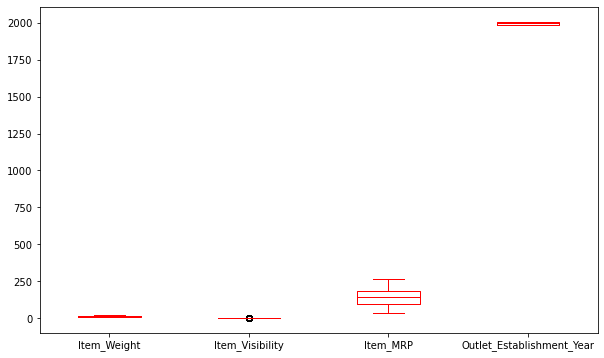

In [94]:
df1.plot(kind="box", figsize=(10,6), color="r",vert=True)

some outliers present in one column

# Z SCORE

In [95]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df1[['Item_Visibility']]))
new_dff=df1[(z<3).all(axis=1)]
new_dff

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,Regular,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


In [96]:
df1.shape

(5681, 9)

In [97]:
#new shape

new_dff.shape

(5600, 9)

# Checking Skewness

In [98]:
new_dff.skew()

Item_Weight                  0.140901
Item_Visibility              0.787861
Item_MRP                     0.133061
Outlet_Establishment_Year   -0.411451
dtype: float64

In [99]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')

In [100]:
new_dff[['Item_Visibility']] = scaler.fit_transform(new_dff[['Item_Visibility']].values)

In [101]:
new_dff.skew()

Item_Weight                  0.140901
Item_Visibility              0.105676
Item_MRP                     0.133061
Outlet_Establishment_Year   -0.411451
dtype: float64

# Label Encoder

In [102]:


le=LabelEncoder()
list=[]
for val in list:
    new_df[val]=le.fit_transform(new_df[val].astype(str))

In [103]:
#Encoding the columns with the help of label encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for val in list:
    new_dff[val]=le.fit_transform(new_dff[val].astype(str))

In [104]:
new_dff.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,-1.453107,13,107.8622,1999,1,0,1
1,8.300000,1,-0.440632,4,87.3198,2007,1,1,1
2,14.600000,0,0.926222,11,241.7538,1998,1,2,0
3,7.315000,0,-1.170062,13,155.0340,2007,1,1,1
4,12.695633,1,1.229130,4,234.2300,1985,1,2,3


# scaling

In [105]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
new_dff = pd.DataFrame(ss.fit_transform(new_dff), columns=new_dff.columns)
new_dff.head

<bound method NDFrame.head of       Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0        1.888840         -0.738413        -1.453107   1.363909 -0.538563   
1       -1.032779          1.354256        -0.440632  -0.767463 -0.871149   
2        0.445631         -0.738413         0.926222   0.890271  1.629171   
3       -1.263927         -0.738413        -1.170062   1.363909  0.225158   
4       -0.001263          1.354256         1.229130  -0.767463  1.507359   
...           ...               ...              ...        ...       ...   
5595    -0.516509          1.354256        -1.236731   1.363909  0.003051   
5596    -1.197046          1.354256         1.556046   1.837547  0.453615   
5597    -0.633843         -0.738413         0.427676   0.179813 -0.362385   
5598     0.609899          1.354256        -1.746075  -1.004282  1.189898   
5599    -0.751177          1.354256         1.012775  -1.004282 -0.992961   

      Outlet_Establishment_Year  Outlet_Size 

# Loading the saved trained model

In [106]:
import joblib
Model=joblib.load("Big_Data_Mart_Sales.pkl")

In [107]:
prediction=Model.predict(x_test)
pred=pd.DataFrame(prediction)

In [108]:
pred

,0
0,690.760671
1,3143.098361
2,636.285535
3,3537.645036
4,1651.469562
...,...
2524,3778.803441
2525,3866.642809
2526,1690.749190
2527,1984.180881
